In [136]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

### Dimensionality Reduction Applied to the Digts Data Set

- Scikit includes numerous datasets used for exploring or training
  - Always use for exploring a new algorithm using to avoid any dataset specific issues 

-  The Iris and MNIST Datasets is a popular ML Scikit-Learn dataset


### PCA on The Iris Dataset

* The Iris flower data set was introduced by Ronald Fisher 
  * Published in a paper in a 1936 paper 

* 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

* Measured four features: the length and the width of the sepals and petals, in centimeters

* See here for more information about the dataset
  * https://en.wikipedia.org/wiki/Iris_flower_data_set

In [ ]:
### Model instantiation and fitting in Scikit-Learn

- The ML algorithms live within the specific directories/module in Scikit-Learn
  - Ex. PCA lives in sklearn.decomposition 

- Object can be created using specific parameters
   - PCA(n_components=2, ...)

    
- All machine learning algorithms in Scikit-Learn have methods from fitting the data
 - pca.fit()
    - Run the algorithm on your data


- The common interface makes it easy and (almost) effortless to change algorithms
  - One line of code to change for random projections
     - Not applicable here


In [ ]:
### Prediction in Scikit-Learn

- `predict()` function that produces predictions for an input array `X_tests` based on the trained estimator. 
  - For classification, returns labels for each element of `X_tests`
  - For regression, returns values computed for the model
    
- Not all unsupervised algorithms implement the `predict()` function
  - The prediction does not make sense in the context of a PCA

- For classification models that compute prediction probabilities, `predict_proba()` returns the probabilities for each label and  each instance
    - Probability that a sequence is in a category

- For unsupervised estimators, such as PCA, `transform()` will take some data and transform it into the new basis.
     - some model implementations have a `fit_transform()`  which efficiently fits and transforms on some input dataset

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

In [7]:
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

![](https://www.dropbox.com/s/nmmcfa9nq4fner7/iris_petal_sepal.png?dl=1)
* Image obtained here here:http://blog.kaggle.com/2015/04/22/scikit-learn-video-3-machine-learning-first-steps-with-the-iris-dataset/


In [15]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
iris['data'].shape

(150, 4)

In [22]:
iris['data'][0]

array([5.1, 3.5, 1.4, 0.2])

In [23]:
iris['target']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
data = pd.DataFrame(iris['data'])
data.columns = iris["feature_names"]
data["species"] = iris['target_names'][iris['target']]
data.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 864x720 with 0 Axes>

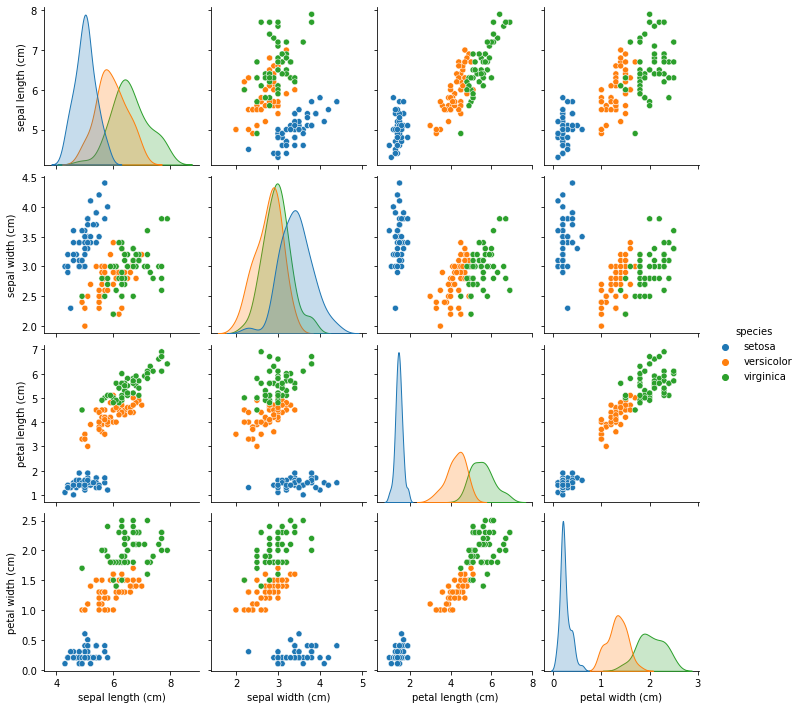

In [39]:
plt.figure(figsize=(12,10))
# plot correlations betweek all pairs of features in the data
# paints each data point using its value for the hue feature
sns.pairplot(data, hue='species');

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris.data)


PCA(n_components=2)

In [43]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [44]:
X_pca = pca.transform(iris.data)
X_pca.shape

(150, 2)

In [50]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [47]:
data['first_component'] = X_pca[:, 0]
data['second_component'] = X_pca[:, 1]

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,first_component,second_component
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


<Figure size 864x576 with 0 Axes>

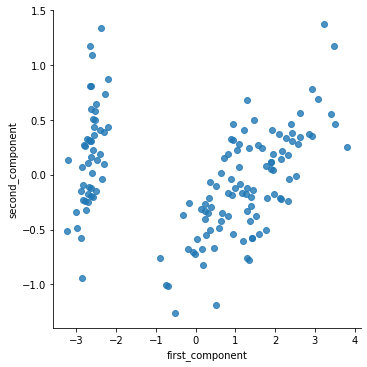

In [58]:
# notice the size inconsistency
plt.figure(figsize=(12,8))
sns.lmplot('first_component', 'second_component',  data, fit_reg=False)

<Figure size 576x432 with 0 Axes>

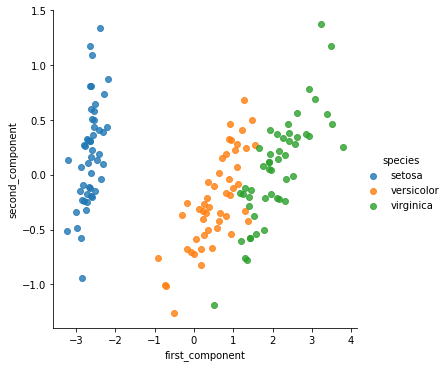

In [61]:
# notice the size inconsistency
plt.figure(figsize=(8,6))
sns.lmplot('first_component', 'second_component',  data, hue="species", fit_reg=False)

### The MNIST Dataset

* The MNIST database of handwritten digits (70k digits) 
  * Typically split as 60,000 examples, and a test set of 10,000 examples. 
* It is a subset of a larger set available from NIST. 
* Size-normalized and centered in a fixed-size image of 28-by-28.



In [71]:
mnist = pd.read_csv("data/mnist.tsv", sep="\t")

In [72]:
mnist.shape

(70000, 786)

In [73]:
mnist.head(1)

,Unnamed: 0,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
mnist = mnist.rename(columns={'Unnamed: 0': "ID"})
mnist.head(1)

,ID,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
mnist = mnist.set_index("ID")
mnist.head()


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,target
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


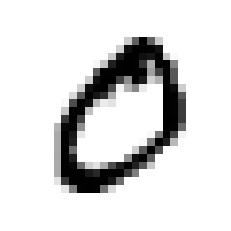

In [139]:
some_digit = mnist.iloc[0].values[:-1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
_ = plt.axis("off")

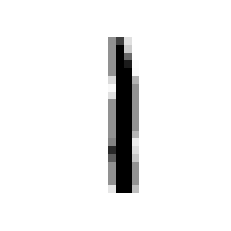

In [142]:
some_digit = mnist.iloc[12000].values[:-1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
_ = plt.axis("off")

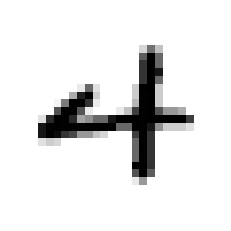

In [146]:
some_digit = mnist.iloc[27000].values[:-1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
_ = plt.axis("off")

In [226]:
mnist_5k = mnist.sample(1000)
mnist_5k.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,target
ID,,,,,,,,,,,,,,,,,,,,,
66952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
68551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
46212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
35638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
39908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [227]:
mnist_5k_no_label = mnist_5k.drop("target", axis=1)

In [228]:
# Projection on to the first 2 principal components
# no need to scale the features since all are on the same scale
digits_pca = PCA(n_components=2).fit(mnist_5k_no_label)
digits_pca.explained_variance_ratio_

array([0.10015214, 0.07244713])

In [229]:
X_pca = digits_pca.transform(mnist_5k_no_label)


In [230]:
from matplotlib import offsetbox

def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(12,4))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #imagebox = offsetbox.AnnotationBbox(
             #   offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
             #   X[i])
            #ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

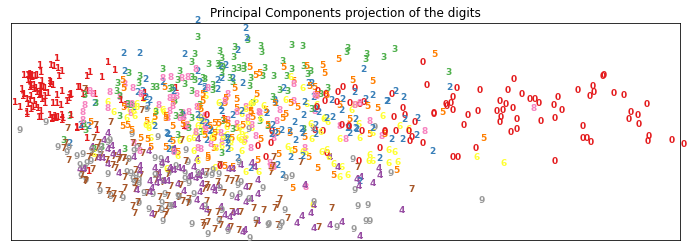

In [231]:
y = np.zeros(1000)
plot_embedding(X_pca, mnist_5k["target"].to_list(), "Principal Components projection of the digits")


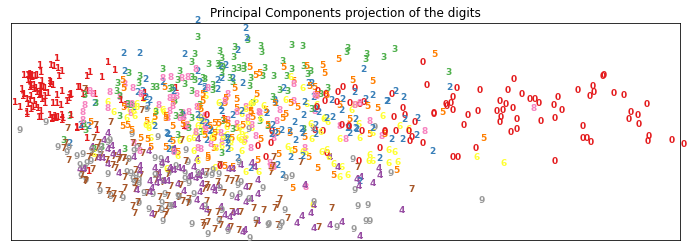

In [232]:
plot_embedding(X_pca, mnist_5k["target"].to_list(), "Principal Components projection of the digits")


In [233]:
digits_pca = PCA().fit(mnist_5k_no_label)
len(digits_pca.explained_variance_ratio_)

784

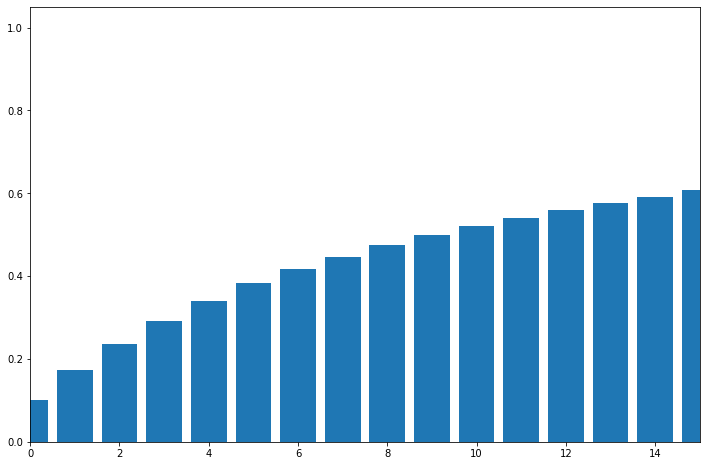

In [237]:
plt.figure(figsize=(12,8))
labels = range(len(digits_pca.explained_variance_ratio_))
plt.bar(labels, np.cumsum(digits_pca.explained_variance_ratio_))
_  =  plt.xlim(0,15)


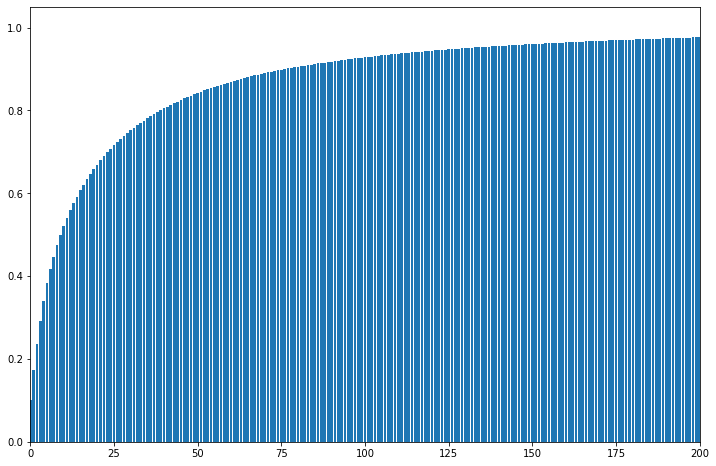

In [238]:
plt.figure(figsize=(12,8))
labels = range(len(digits_pca.explained_variance_ratio_))
plt.bar(labels, np.cumsum(digits_pca.explained_variance_ratio_))
_  =  plt.xlim(0,200)


In [244]:
y = np.zeros(1000)

Computing t-SNE embedding on 28x28 digits
total run time is:  6.171499013900757


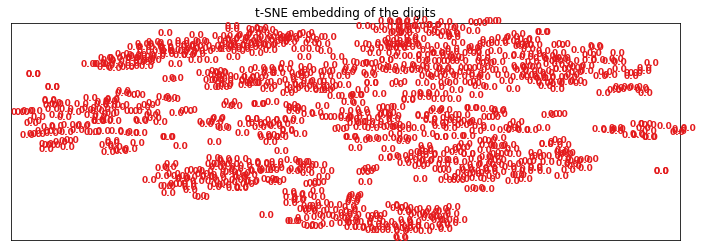

In [249]:
print("Computing t-SNE embedding on 28x28 digits")
from sklearn.manifold import TSNE
import time
start_time = time.time()
tsne = TSNE(n_components=2, random_state=0, perplexity=40, n_iter=1000)
X_tsne = tsne.fit_transform(mnist_5k_no_label)
print("total run time is: ", time.time() - start_time)

plot_embedding(X_tsne, y, "t-SNE embedding of the digits")


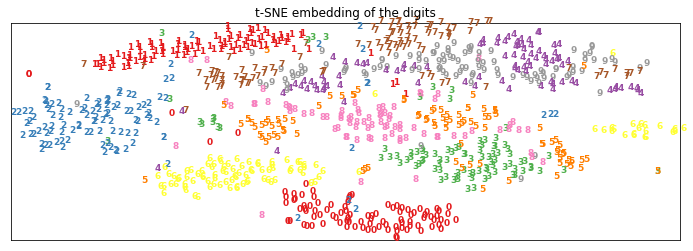

In [250]:

plot_embedding(X_tsne, mnist_5k["target"].to_list(), "t-SNE embedding of the digits")
